In [8]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
pip install summarytools

In [10]:
#Warnings
import warnings
warnings.filterwarnings("ignore")

In [11]:
from sklearn.metrics import *
from sklearn.cluster import KMeans

In [12]:
#Mounting Google Drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Dataset

In [13]:
data=pd.read_csv("/content/drive/MyDrive/Cricket.xls",encoding="ISO-8859-1")
data

Player       Span  Mat  Inns  NO   Runs    HS    Ave  \
0          SR Tendulkar (INDIA)  1989-2012  463   452  41  18426  200*  44.83   
1   KC Sangakkara (Asia/ICC/SL)  2000-2015  404   380  41  14234   169  41.98   
2          RT Ponting (AUS/ICC)  1995-2012  375   365  39  13704   164  42.03   
3       ST Jayasuriya (Asia/SL)  1989-2011  445   433  18  13430   189  32.36   
4    DPMD Jayawardene (Asia/SL)  1998-2015  448   418  39  12650   144  33.37   
..                          ...        ...  ...   ...  ..    ...   ...    ...   
74            CG Greenidge (WI)  1975-1991  128   127  13   5134  133*  45.03   
75          Misbah-ul-Haq (PAK)  2002-2015  162   149  31   5122   96*  43.40   
76         PD Collingwood (ENG)  2001-2011  197   181  37   5092  120*  35.36   
77              A Symonds (AUS)  1998-2009  198   161  33   5088   156  39.75   
78      Abdul Razzaq (Asia/PAK)  1996-2011  265   228  57   5080   112  29.70   

       BF     SR  100  50   0  
0   21367  86.23   49  96  20  
1   18048  78.86   25  93  15  
2   17046  80.39   30  82  20  
3   14725  91.20   28  68  34  
4   16020  78.96   19  77  28  
..    ...    ...  ...  ..  ..  
74   7908  64.92   11  31   3  
75   6945  73.75    0  42   6  
76   6614  76.98    5  26   7  
77   5504  92.44    6  30  15  
78   6252  81.25    3  23  14  

[79 rows x 13 columns]

In [14]:
from summarytools import dfSummary
dfSummary(data)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


In [16]:
data.describe(include="all")

Player       Span         Mat        Inns         NO  \
count                     79         79   79.000000   79.000000  79.000000   
unique                    79         65         NaN         NaN        NaN   
top     SR Tendulkar (INDIA)  1992-2003         NaN         NaN        NaN   
freq                       1          3         NaN         NaN        NaN   
mean                     NaN        NaN  245.075949  230.544304  30.037975   
std                      NaN        NaN   74.211716   70.321022  14.421710   
min                      NaN        NaN  128.000000  127.000000   4.000000   
25%                      NaN        NaN  188.000000  177.000000  17.500000   
50%                      NaN        NaN  232.000000  217.000000  29.000000   
75%                      NaN        NaN  281.500000  261.500000  40.000000   
max                      NaN        NaN  463.000000  452.000000  70.000000   

                Runs    HS        Ave            BF          SR        100  \
count      79.000000    79  79.000000     79.000000   79.000000  79.000000   
unique           NaN    62        NaN           NaN         NaN        NaN   
top              NaN  119*        NaN           NaN         NaN        NaN   
freq             NaN     3        NaN           NaN         NaN        NaN   
mean     7618.139241   NaN  38.523291   9684.455696   79.295316  11.556962   
std      2551.873313   NaN   5.919093   3193.835825    9.925307   8.092014   
min      5080.000000   NaN  23.570000   5504.000000   60.570000   0.000000   
25%      5759.000000   NaN  34.600000   7393.500000   73.725000   6.000000   
50%      6798.000000   NaN  37.870000   9134.000000   77.730000  10.000000   
75%      8739.500000   NaN  41.845000  10976.000000   85.180000  15.500000   
max     18426.000000   NaN  53.940000  21367.000000  117.000000  49.000000   

               50          0  
count   79.000000  79.000000  
unique        NaN        NaN  
top           NaN        NaN  
freq          NaN        NaN  
mean    46.443038  13.253165  
std     16.351701   5.925755  
min     23.000000   3.000000  
25%     34.500000   9.000000  
50%     42.000000  13.000000  
75%     54.000000  16.000000  
max     96.000000  34.000000

In [17]:
!pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 30.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=671b489271a489ff64094715cf3d917f6be33595cd3a0643343b5b31c0750785
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [18]:
!pip install ipywidgets

In [19]:
from ydata_profiling import ProfileReport

In [20]:
profile=ProfileReport(data,title="Summary Report")

profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
data["Span"].head()

0    1989-2012
1    2000-2015
2    1995-2012
3    1989-2011
4    1998-2015
Name: Span, dtype: object

In [22]:
data[["start_year","end_year"]]=data["Span"].str.split("-",expand=True)

In [23]:
data.head()

Player       Span  Mat  Inns  NO   Runs    HS    Ave  \
0         SR Tendulkar (INDIA)  1989-2012  463   452  41  18426  200*  44.83   
1  KC Sangakkara (Asia/ICC/SL)  2000-2015  404   380  41  14234   169  41.98   
2         RT Ponting (AUS/ICC)  1995-2012  375   365  39  13704   164  42.03   
3      ST Jayasuriya (Asia/SL)  1989-2011  445   433  18  13430   189  32.36   
4   DPMD Jayawardene (Asia/SL)  1998-2015  448   418  39  12650   144  33.37   

      BF     SR  100  50   0 start_year end_year  
0  21367  86.23   49  96  20       1989     2012  
1  18048  78.86   25  93  15       2000     2015  
2  17046  80.39   30  82  20       1995     2012  
3  14725  91.20   28  68  34       1989     2011  
4  16020  78.96   19  77  28       1998     2015

In [24]:
data["start_year"].dtype

dtype('O')

In [25]:
data["end_year"].dtype

dtype('O')

In [26]:
data["start_year"]=data["start_year"].astype(int)

In [27]:
data["start_year"].dtype

dtype('int64')

In [28]:
data["end_year"]=data["end_year"].astype(int)

In [29]:
data["end_year"].dtype

dtype('int64')

In [30]:
data["years_of_playing"]=data["end_year"]-data["start_year"]
data["years_of_playing"]

0     23
1     15
2     17
3     22
4     17
      ..
74    16
75    13
76    10
77    11
78    15
Name: years_of_playing, Length: 79, dtype: int64

In [31]:
data.head()

Player       Span  Mat  Inns  NO   Runs    HS    Ave  \
0         SR Tendulkar (INDIA)  1989-2012  463   452  41  18426  200*  44.83   
1  KC Sangakkara (Asia/ICC/SL)  2000-2015  404   380  41  14234   169  41.98   
2         RT Ponting (AUS/ICC)  1995-2012  375   365  39  13704   164  42.03   
3      ST Jayasuriya (Asia/SL)  1989-2011  445   433  18  13430   189  32.36   
4   DPMD Jayawardene (Asia/SL)  1998-2015  448   418  39  12650   144  33.37   

      BF     SR  100  50   0  start_year  end_year  years_of_playing  
0  21367  86.23   49  96  20        1989      2012                23  
1  18048  78.86   25  93  15        2000      2015                15  
2  17046  80.39   30  82  20        1995      2012                17  
3  14725  91.20   28  68  34        1989      2011                22  
4  16020  78.96   19  77  28        1998      2015                17

In [32]:
data.drop("Span",axis=1)

Player  Mat  Inns  NO   Runs    HS    Ave     BF  \
0          SR Tendulkar (INDIA)  463   452  41  18426  200*  44.83  21367   
1   KC Sangakkara (Asia/ICC/SL)  404   380  41  14234   169  41.98  18048   
2          RT Ponting (AUS/ICC)  375   365  39  13704   164  42.03  17046   
3       ST Jayasuriya (Asia/SL)  445   433  18  13430   189  32.36  14725   
4    DPMD Jayawardene (Asia/SL)  448   418  39  12650   144  33.37  16020   
..                          ...  ...   ...  ..    ...   ...    ...    ...   
74            CG Greenidge (WI)  128   127  13   5134  133*  45.03   7908   
75          Misbah-ul-Haq (PAK)  162   149  31   5122   96*  43.40   6945   
76         PD Collingwood (ENG)  197   181  37   5092  120*  35.36   6614   
77              A Symonds (AUS)  198   161  33   5088   156  39.75   5504   
78      Abdul Razzaq (Asia/PAK)  265   228  57   5080   112  29.70   6252   

       SR  100  50   0  start_year  end_year  years_of_playing  
0   86.23   49  96  20        1989      2012                23  
1   78.86   25  93  15        2000      2015                15  
2   80.39   30  82  20        1995      2012                17  
3   91.20   28  68  34        1989      2011                22  
4   78.96   19  77  28        1998      2015                17  
..    ...  ...  ..  ..         ...       ...               ...  
74  64.92   11  31   3        1975      1991                16  
75  73.75    0  42   6        2002      2015                13  
76  76.98    5  26   7        2001      2011                10  
77  92.44    6  30  15        1998      2009                11  
78  81.25    3  23  14        1996      2011                15  

[79 rows x 15 columns]

In [33]:
data["HS"].value_counts()

HS
119*    3
145     3
120*    3
131*    3
169     2
       ..
124     1
134*    1
130     1
159     1
156     1
Name: count, Length: 62, dtype: int64

In [34]:
data2=data["HS"]
data2

0     200*
1      169
2      164
3      189
4      144
      ... 
74    133*
75     96*
76    120*
77     156
78     112
Name: HS, Length: 79, dtype: object

In [35]:
data2.to_string()

'0     200*\n1      169\n2      164\n3      189\n4      144\n5     137*\n6      139\n7      183\n8      153\n9      169\n10    161*\n11    141*\n12     172\n13    183*\n14    153*\n15    162*\n16     145\n17     215\n18     194\n19     150\n20     150\n21    152*\n22    132*\n23     173\n24     219\n25     183\n26     175\n27     124\n28    134*\n29     130\n30    120*\n31    131*\n32    119*\n33     144\n34     159\n35     102\n36    145*\n37     141\n38    108*\n39    188*\n40     145\n41     143\n42    189*\n43    142*\n44    139*\n45    127*\n46    131*\n47     122\n48    174*\n49    181*\n50     166\n51     145\n52     122\n53     121\n54    140*\n55    119*\n56    120*\n57    124*\n58    113*\n59    185*\n60     154\n61    116*\n62     112\n63    237*\n64    109*\n65     264\n66     141\n67     119\n68    144*\n69    145*\n70    150*\n71    131*\n72    133*\n73    119*\n74    133*\n75     96*\n76    120*\n77     156\n78     112'

In [36]:
data[["HS","Extra"]]=data["HS"].str.split("*",expand=True)

In [37]:
data.head()

Player       Span  Mat  Inns  NO   Runs   HS    Ave  \
0         SR Tendulkar (INDIA)  1989-2012  463   452  41  18426  200  44.83   
1  KC Sangakkara (Asia/ICC/SL)  2000-2015  404   380  41  14234  169  41.98   
2         RT Ponting (AUS/ICC)  1995-2012  375   365  39  13704  164  42.03   
3      ST Jayasuriya (Asia/SL)  1989-2011  445   433  18  13430  189  32.36   
4   DPMD Jayawardene (Asia/SL)  1998-2015  448   418  39  12650  144  33.37   

      BF     SR  100  50   0  start_year  end_year  years_of_playing Extra  
0  21367  86.23   49  96  20        1989      2012                23        
1  18048  78.86   25  93  15        2000      2015                15  None  
2  17046  80.39   30  82  20        1995      2012                17  None  
3  14725  91.20   28  68  34        1989      2011                22  None  
4  16020  78.96   19  77  28        1998      2015                17  None

In [38]:
data.drop("Extra",axis=1,inplace=True)

In [39]:
data.drop("Span",axis=1,inplace=True)

In [40]:
data.head()

Player  Mat  Inns  NO   Runs   HS    Ave     BF  \
0         SR Tendulkar (INDIA)  463   452  41  18426  200  44.83  21367   
1  KC Sangakkara (Asia/ICC/SL)  404   380  41  14234  169  41.98  18048   
2         RT Ponting (AUS/ICC)  375   365  39  13704  164  42.03  17046   
3      ST Jayasuriya (Asia/SL)  445   433  18  13430  189  32.36  14725   
4   DPMD Jayawardene (Asia/SL)  448   418  39  12650  144  33.37  16020   

      SR  100  50   0  start_year  end_year  years_of_playing  
0  86.23   49  96  20        1989      2012                23  
1  78.86   25  93  15        2000      2015                15  
2  80.39   30  82  20        1995      2012                17  
3  91.20   28  68  34        1989      2011                22  
4  78.96   19  77  28        1998      2015                17

In [41]:
data.isnull().sum()

Player              0
Mat                 0
Inns                0
NO                  0
Runs                0
HS                  0
Ave                 0
BF                  0
SR                  0
100                 0
50                  0
0                   0
start_year          0
end_year            0
years_of_playing    0
dtype: int64

In [42]:
data.duplicated().sum()

0

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Player            79 non-null     object 
 1   Mat               79 non-null     int64  
 2   Inns              79 non-null     int64  
 3   NO                79 non-null     int64  
 4   Runs              79 non-null     int64  
 5   HS                79 non-null     object 
 6   Ave               79 non-null     float64
 7   BF                79 non-null     int64  
 8   SR                79 non-null     float64
 9   100               79 non-null     int64  
 10  50                79 non-null     int64  
 11  0                 79 non-null     int64  
 12  start_year        79 non-null     int64  
 13  end_year          79 non-null     int64  
 14  years_of_playing  79 non-null     int64  
dtypes: float64(2), int64(11), object(2)
memory usage: 9.4+ KB


In [44]:
#making copy of Data
data_copy=data.copy()

In [45]:
data_copy=data_copy.drop("Player",axis=1)
data_copy

Mat  Inns  NO   Runs   HS    Ave     BF     SR  100  50   0  start_year  \
0   463   452  41  18426  200  44.83  21367  86.23   49  96  20        1989   
1   404   380  41  14234  169  41.98  18048  78.86   25  93  15        2000   
2   375   365  39  13704  164  42.03  17046  80.39   30  82  20        1995   
3   445   433  18  13430  189  32.36  14725  91.20   28  68  34        1989   
4   448   418  39  12650  144  33.37  16020  78.96   19  77  28        1998   
..  ...   ...  ..    ...  ...    ...    ...    ...  ...  ..  ..         ...   
74  128   127  13   5134  133  45.03   7908  64.92   11  31   3        1975   
75  162   149  31   5122   96  43.40   6945  73.75    0  42   6        2002   
76  197   181  37   5092  120  35.36   6614  76.98    5  26   7        2001   
77  198   161  33   5088  156  39.75   5504  92.44    6  30  15        1998   
78  265   228  57   5080  112  29.70   6252  81.25    3  23  14        1996   

    end_year  years_of_playing  
0       2012                23  
1       2015                15  
2       2012                17  
3       2011                22  
4       2015                17  
..       ...               ...  
74      1991                16  
75      2015                13  
76      2011                10  
77      2009                11  
78      2011                15  

[79 rows x 14 columns]

Model Building

In [46]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data_copy)

In [47]:
scaled_data

array([[ 2.95528204,  3.1693334 ,  0.76496275, ..., -0.67030765,
         0.46828112,  2.81278702],
       [ 2.15517925,  2.13891509,  0.76496275, ...,  0.62126074,
         0.86464763,  0.38093832],
       [ 1.76190839,  1.92424461,  0.6253968 , ...,  0.0341842 ,
         0.46828112,  0.9889005 ],
       ...,
       [-0.65196103, -0.70904664,  0.48583085, ...,  0.73867605,
         0.33615894, -1.13896711],
       [-0.63839997, -0.99527395,  0.20669894, ...,  0.38643013,
         0.0719146 , -0.83498602],
       [ 0.27019133, -0.03641246,  1.88149036, ...,  0.15159951,
         0.33615894,  0.38093832]])

IMPLEMENTATION

In [48]:
#Determine no of samples
n_samples=len(scaled_data)
n_samples

79

In [49]:
# Define the range of clusters to test, ensuring it does not exceed the number of samples

max_clusters=min(10,n_samples)
clusters=list(range(2,max_clusters+1))

# Define a list to capture all the WCSS values
wcss=[]

# Start the process
for x in clusters:
    try:
        # Initialize the model with "x" clusters
        model=KMeans(n_clusters=x,random_state=42)
        # Fit the data into the model
        model.fit(scaled_data)
        # Capture the WCSS
        wcss.append(model.inertia_)
        #Print wcss
        print(f"The model with {x} clusters has wcss:{model.inertia_}")

    except Valuerror as e:
        print(f"error with {x} clusters:{e}")

The model with 2 clusters has wcss:802.0155971289089
The model with 3 clusters has wcss:652.9345783445052
The model with 4 clusters has wcss:564.8040235082904
The model with 5 clusters has wcss:531.212938546461
The model with 6 clusters has wcss:498.7757275799018
The model with 7 clusters has wcss:453.5987532282011
The model with 8 clusters has wcss:450.4358459541563
The model with 9 clusters has wcss:408.77902203286567
The model with 10 clusters has wcss:390.8173525667934


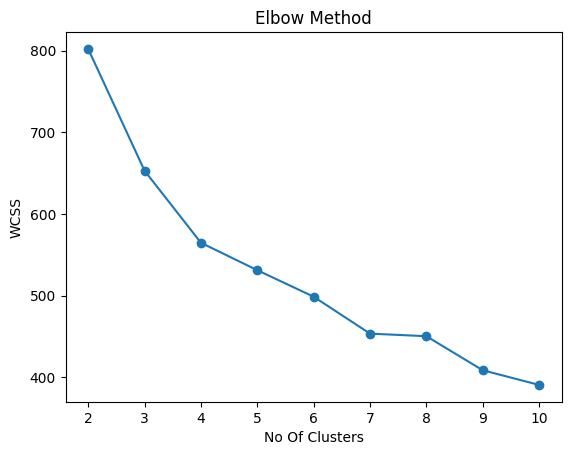

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline


# Plot WCSS to find the optimal number of clusters (Elbow Method)
plt.plot(clusters,wcss,marker='o')
plt.title("Elbow Method")
plt.xlabel("No Of Clusters")
plt.ylabel("WCSS")
plt.show()

The model with 2 clusters has WCSS: 802.0155971289089 and Silhouette Score: 0.25101358180800837
The model with 3 clusters has WCSS: 652.9345783445052 and Silhouette Score: 0.20947631424935453
The model with 4 clusters has WCSS: 564.8040235082904 and Silhouette Score: 0.19860102668909577
The model with 5 clusters has WCSS: 531.212938546461 and Silhouette Score: 0.174965446778569
The model with 6 clusters has WCSS: 498.7757275799018 and Silhouette Score: 0.1642256898307676
The model with 7 clusters has WCSS: 453.5987532282011 and Silhouette Score: 0.16381355190264046
The model with 8 clusters has WCSS: 450.4358459541563 and Silhouette Score: 0.1573492827140387
The model with 9 clusters has WCSS: 408.77902203286567 and Silhouette Score: 0.16079319323126695
The model with 10 clusters has WCSS: 390.8173525667934 and Silhouette Score: 0.15377031382050005


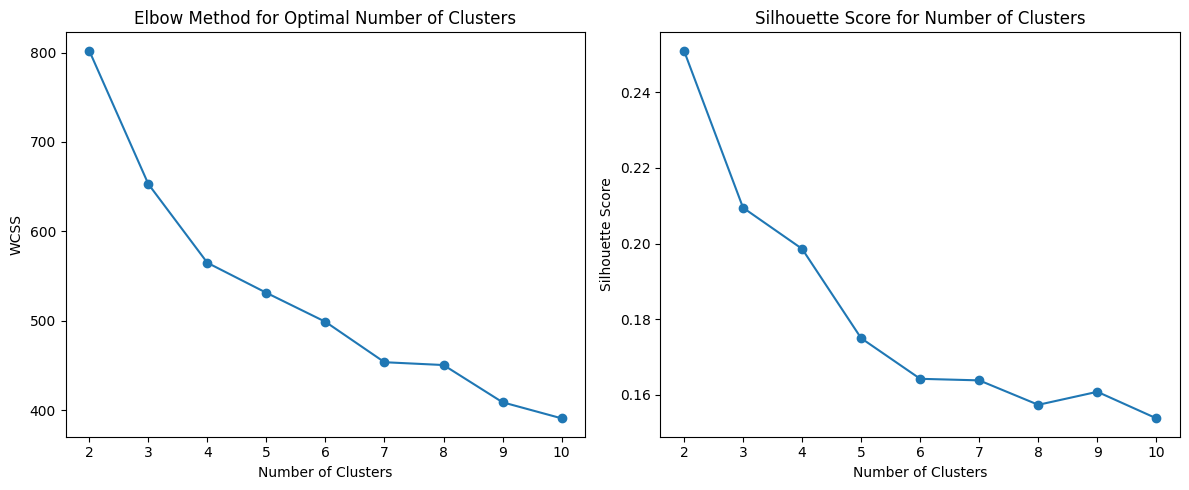

In [51]:
# Lists to hold WCSS and Silhouette Scores
wcss = []
sil_scores = []

# Number of samples
n_samples = len(scaled_data)

# Range of clusters
min_clusters = 2
max_clusters = min(10, n_samples)

for x in range(min_clusters, max_clusters + 1):
    model = KMeans(n_clusters=x, random_state=42)
    cluster_labels = model.fit_predict(scaled_data)

    wcss.append(model.inertia_)

    try:
        # Compute silhouette score
        sil_score = silhouette_score(scaled_data, cluster_labels)
        sil_scores.append(sil_score)
        print(f"The model with {x} clusters has WCSS: {model.inertia_} and Silhouette Score: {sil_score}")
    except ValueError as e:
        print(f"Error calculating silhouette score for {x} clusters: {e}")

# Plot WCSS
plt.figure(figsize=(12, 5))

# Plot WCSS
plt.subplot(1, 2, 1)
plt.plot(range(min_clusters, max_clusters + 1), wcss, marker="o")
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range(min_clusters, max_clusters + 1), sil_scores, marker='o')
plt.title('Silhouette Score for Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


MODEL BUILDING

In [52]:
model=KMeans(n_clusters=3)
model.fit(scaled_data)

KMeans(n_clusters=3)

In [53]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 1,
       1, 1, 2, 2, 2, 0, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1,
       1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1], dtype=int32)

In [54]:
data["Cluster_Assigned"] = model.labels_

In [55]:
data.tail()

Player  Mat  Inns  NO  Runs   HS    Ave    BF     SR  \
74        CG Greenidge (WI)  128   127  13  5134  133  45.03  7908  64.92   
75      Misbah-ul-Haq (PAK)  162   149  31  5122   96  43.40  6945  73.75   
76     PD Collingwood (ENG)  197   181  37  5092  120  35.36  6614  76.98   
77          A Symonds (AUS)  198   161  33  5088  156  39.75  5504  92.44   
78  Abdul Razzaq (Asia/PAK)  265   228  57  5080  112  29.70  6252  81.25   

    100  50   0  start_year  end_year  years_of_playing  Cluster_Assigned  
74   11  31   3        1975      1991                16                 1  
75    0  42   6        2002      2015                13                 2  
76    5  26   7        2001      2011                10                 2  
77    6  30  15        1998      2009                11                 2  
78    3  23  14        1996      2011                15                 1